In [99]:
import pandas as pd
import seaborn as sns
import numpy as np

In [100]:
dado = pd.read_excel('Datasets/Cities_Brazil_IBGE.xlsx')
dado.head(3)

,IBGECode,LocalCidade,LocalUF,LocalEstado,RegiaoBrasil,Latitude,Longitude,Gentilico,PopEstimada_2018,PopCenso 2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,1100015,ALTA FLORESTA D'OESTE,RO,Rondonia,N,-119283,-619953,alta-florense,23167,24392,"0,641",53490,47577,"16461,11"
1,1100023,ARIQUEMES,RO,Rondonia,N,-990571,-630325,ariquemense,106168,90353,"0,702",0,0,"19401,43"
2,1100031,CABIXI,RO,Rondonia,N,-134945,-60552,cabixiense,5438,6313,"0,65",22635,19354,"18346,17"


In [101]:
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   IBGECode                 5570 non-null   int64 
 1   LocalCidade              5570 non-null   object
 2   LocalUF                  5570 non-null   object
 3   LocalEstado              5570 non-null   object
 4   RegiaoBrasil             5570 non-null   object
 5   Latitude                 5570 non-null   object
 6   Longitude                5570 non-null   object
 7   Gentilico                5570 non-null   object
 8   PopEstimada_2018         5570 non-null   int64 
 9   PopCenso 2010            5570 non-null   int64 
 10  IDHM                     5564 non-null   object
 11  ReceitasRealizadas_2014  5570 non-null   int64 
 12  DespesasEmpenhadas_2014  5570 non-null   int64 
 13  Pib_2014                 5570 non-null   object
dtypes: int64(5), object(9)
memory usage: 609

In [102]:
dado.columns

Index(['IBGECode', 'LocalCidade', 'LocalUF', 'LocalEstado', 'RegiaoBrasil',
       'Latitude', 'Longitude', 'Gentilico', 'PopEstimada_2018',
       'PopCenso 2010', 'IDHM', 'ReceitasRealizadas_2014',
       'DespesasEmpenhadas_2014', 'Pib_2014'],
      dtype='object')

### Obs 1: repare que a Coluna 'Pib_2014' não está em formato de número, está como se fosse o dado tipo string.
    - Precisamos primeiro concetar isso para que possamos trabralhar.
### Obs 2: Assim como as colunas 'Latitude', 'Longitude' e 'IDHM'.
    - Assim tmabém precisamos fazer as converções.

In [103]:
type(dado['Pib_2014'].iloc[0])

str

In [104]:
#sns.displot(x='Pib_2014', y='LocalUF', data=dado)
#dado['Latitude'] = dado['Latitude'].apply(lambda x :)
dado['Latitude'].value_counts()

-214148    2
-189141    2
-293919    2
-229129    2
-192345    2
          ..
-146151    1
-114429    1
-123914    1
-130215    1
-157795    1
Name: Latitude, Length: 5520, dtype: int64

In [105]:
type(dado['Latitude'].iloc[0])

int

In [106]:
type(dado['Longitude'].iloc[0])

int

In [107]:
type(dado['Pib_2014'].iloc[0])

str

### Na célula abaixo, podemos ver um teste, assim podemos concluir em como resolver nosso problema.
    - Nosso problema se dava porque quando abrimos a função lambda, ela não vem com valor definido.
    então devemos dizer que tipo de dado ela é, porque se não, nós não conseguiremos converter para o tipo de dado
    que queremos, e a função replace só funciona para strings.

In [108]:
p = dado['Pib_2014']
s = p.apply(lambda x : float(str(x).replace(',','.')))
s

0       16461.11
1       19401.43
2       18346.17
3       20725.23
4       22179.17
          ...   
5565    23237.24
5566    39480.36
5567    18992.37
5568    35691.39
5569    73971.05
Name: Pib_2014, Length: 5570, dtype: float64

In [109]:
dado['Pib_2014'] = dado['Pib_2014'].apply( lambda x : float(str(x).replace(',','.')))
type(dado['Pib_2014'].iloc[0])

numpy.float64

In [110]:
dado['Pib_2014']

0       16461.11
1       19401.43
2       18346.17
3       20725.23
4       22179.17
          ...   
5565    23237.24
5566    39480.36
5567    18992.37
5568    35691.39
5569    73971.05
Name: Pib_2014, Length: 5570, dtype: float64

### Agora que convertemos, vamos fazer o mesmo para as colunas latidude, longitude e IDHM.

In [111]:
dado.columns

Index(['IBGECode', 'LocalCidade', 'LocalUF', 'LocalEstado', 'RegiaoBrasil',
       'Latitude', 'Longitude', 'Gentilico', 'PopEstimada_2018',
       'PopCenso 2010', 'IDHM', 'ReceitasRealizadas_2014',
       'DespesasEmpenhadas_2014', 'Pib_2014'],
      dtype='object')

In [112]:
dado['Latitude'] = dado['Latitude'].apply( lambda x : float(str(x).replace(',','.')))
dado['Longitude'] = dado['Longitude'].apply( lambda x : float(str(x).replace(',','.')))

In [113]:
dado['IDHM'] = dado['IDHM'].apply(lambda x : float(str(x).replace(',','.')))

In [114]:
dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   IBGECode                 5570 non-null   int64  
 1   LocalCidade              5570 non-null   object 
 2   LocalUF                  5570 non-null   object 
 3   LocalEstado              5570 non-null   object 
 4   RegiaoBrasil             5570 non-null   object 
 5   Latitude                 5570 non-null   float64
 6   Longitude                5570 non-null   float64
 7   Gentilico                5570 non-null   object 
 8   PopEstimada_2018         5570 non-null   int64  
 9   PopCenso 2010            5570 non-null   int64  
 10  IDHM                     5564 non-null   float64
 11  ReceitasRealizadas_2014  5570 non-null   int64  
 12  DespesasEmpenhadas_2014  5570 non-null   int64  
 13  Pib_2014                 5570 non-null   float64
dtypes: float64(4), int64(5),

# Tranformações feita nos dados.
## podemos começar com as analises gráficas no Seaborn.

In [115]:
dado.columns

Index(['IBGECode', 'LocalCidade', 'LocalUF', 'LocalEstado', 'RegiaoBrasil',
       'Latitude', 'Longitude', 'Gentilico', 'PopEstimada_2018',
       'PopCenso 2010', 'IDHM', 'ReceitasRealizadas_2014',
       'DespesasEmpenhadas_2014', 'Pib_2014'],
      dtype='object')

In [116]:
dado.head(3)

,IBGECode,LocalCidade,LocalUF,LocalEstado,RegiaoBrasil,Latitude,Longitude,Gentilico,PopEstimada_2018,PopCenso 2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,1100015,ALTA FLORESTA D'OESTE,RO,Rondonia,N,-119283.0,-619953.0,alta-florense,23167,24392,0.641,53490,47577,16461.11
1,1100023,ARIQUEMES,RO,Rondonia,N,-990571.0,-630325.0,ariquemense,106168,90353,0.702,0,0,19401.43
2,1100031,CABIXI,RO,Rondonia,N,-134945.0,-60552.0,cabixiense,5438,6313,0.650,22635,19354,18346.17


<AxesSubplot:xlabel='RegiaoBrasil', ylabel='Pib_2014'>

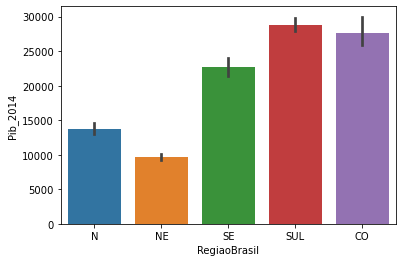

In [117]:
sns.barplot(x='RegiaoBrasil',y='Pib_2014', data=dado)

<AxesSubplot:xlabel='Pib_2014', ylabel='RegiaoBrasil'>

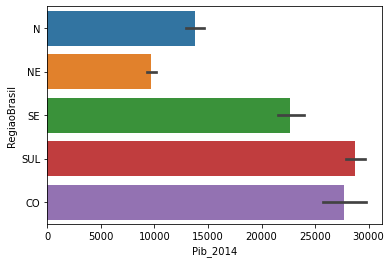

In [118]:
sns.barplot(y='RegiaoBrasil',x='Pib_2014', data=dado)

<AxesSubplot:xlabel='RegiaoBrasil', ylabel='IDHM'>

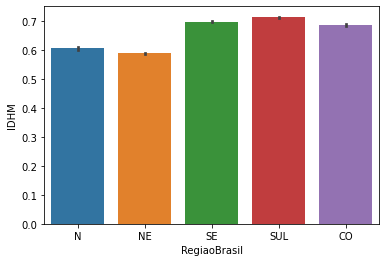

In [119]:
sns.barplot(x='RegiaoBrasil',y='IDHM', data=dado)

<AxesSubplot:xlabel='IDHM', ylabel='RegiaoBrasil'>

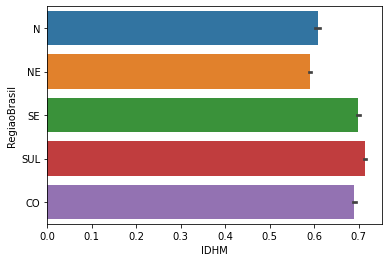

In [120]:
sns.barplot(y='RegiaoBrasil',x='IDHM', data=dado)

In [121]:
dado.columns

Index(['IBGECode', 'LocalCidade', 'LocalUF', 'LocalEstado', 'RegiaoBrasil',
       'Latitude', 'Longitude', 'Gentilico', 'PopEstimada_2018',
       'PopCenso 2010', 'IDHM', 'ReceitasRealizadas_2014',
       'DespesasEmpenhadas_2014', 'Pib_2014'],
      dtype='object')

<AxesSubplot:xlabel='PopEstimada_2018', ylabel='RegiaoBrasil'>

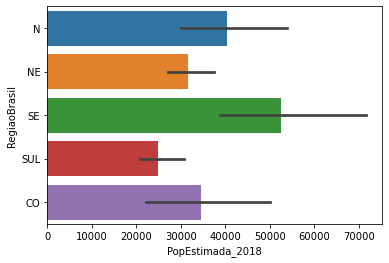

In [122]:
sns.barplot(y='RegiaoBrasil', x='PopEstimada_2018', data=dado)

<AxesSubplot:xlabel='RegiaoBrasil', ylabel='DespesasEmpenhadas_2014'>

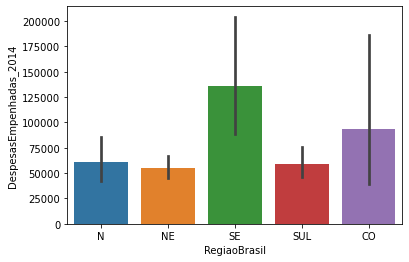

In [123]:
sns.barplot(x='RegiaoBrasil', y='DespesasEmpenhadas_2014', data=dado)

In [124]:
y = dado[dado['RegiaoBrasil'] == 'NE']['PopEstimada_2018']
y.sort_index(ignore_index=False)
y
#x.sort_values(ascending=True)
#x

450     111757
451       6469
452      12488
453      22083
454      26302
         ...  
2239    338885
2240      9347
2241     12299
2242     21228
2243     46440
Name: PopEstimada_2018, Length: 1794, dtype: int64

# Plots de regressão.

In [128]:
dado.head(3)

,IBGECode,LocalCidade,LocalUF,LocalEstado,RegiaoBrasil,Latitude,Longitude,Gentilico,PopEstimada_2018,PopCenso 2010,IDHM,ReceitasRealizadas_2014,DespesasEmpenhadas_2014,Pib_2014
0,1100015,ALTA FLORESTA D'OESTE,RO,Rondonia,N,-119283.0,-619953.0,alta-florense,23167,24392,0.641,53490,47577,16461.11
1,1100023,ARIQUEMES,RO,Rondonia,N,-990571.0,-630325.0,ariquemense,106168,90353,0.702,0,0,19401.43
2,1100031,CABIXI,RO,Rondonia,N,-134945.0,-60552.0,cabixiense,5438,6313,0.650,22635,19354,18346.17


In [127]:
dado.columns

Index(['IBGECode', 'LocalCidade', 'LocalUF', 'LocalEstado', 'RegiaoBrasil',
       'Latitude', 'Longitude', 'Gentilico', 'PopEstimada_2018',
       'PopCenso 2010', 'IDHM', 'ReceitasRealizadas_2014',
       'DespesasEmpenhadas_2014', 'Pib_2014'],
      dtype='object')

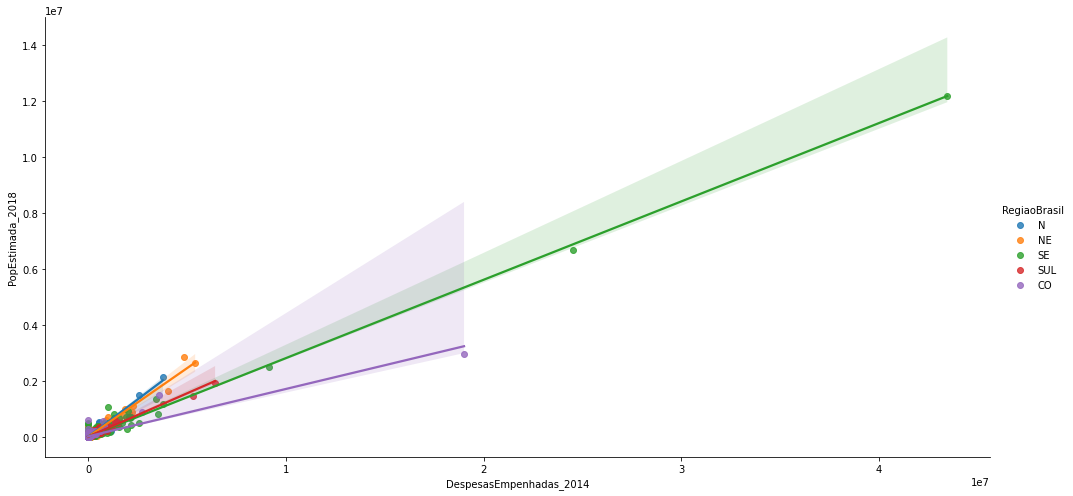

In [140]:
sns.lmplot(x='DespesasEmpenhadas_2014', y='PopEstimada_2018', data=dado, aspect=2, height=7, hue='RegiaoBrasil')